<h1 style="border: thick double #32a1ce; text-align:center;border-radius:35px">
Projet Python pour la data science
</h1>

<h1 style="text-align: center"> 
Prérequis 
</h1>

In [5]:
# Librairies standards
import zipfile
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, cos, sin, asin, sqrt
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path

In [6]:
# Définition du répertoire de travail
HOME_DIR = Path.cwd().parent
DATA_DIR = Path(HOME_DIR, "data")
print(f"Work directory: {HOME_DIR} \nData directory: {DATA_DIR}")

Work directory: /home/onyxia/work/projet-Python-1/projet 
Data directory: /home/onyxia/work/projet-Python-1/projet/data


<h1 style=" text-align:center">
1.Description des données 
</h1>

<h2 style=" text-align:left">
1.1- Chargement des bases 
</h2>

Dans le cadre de notre travail nous allons utiliser 05 bases de données qui porte essentiellement sur: 
   dans cette partie il est question de chargé et visualiser nos  differentes  bases de données.

<h3 style=" text-align:left">
a. Données sur la qualité de l'air  
</h3>

In [7]:
qualite_air = pd.read_csv(Path(DATA_DIR, "indices_QA_commune_IDF_2017.csv"), sep=",")
qualite_air.head(5)

,date,ninsee,no2,o3,pm10
0,01/01/2017,0,23,16,43
1,01/01/2017,75,23,8,38
2,01/01/2017,77,19,17,44
3,01/01/2017,78,16,15,32
4,01/01/2017,91,14,16,34


In [8]:
qualite_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476485 entries, 0 to 476484
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    476485 non-null  object
 1   ninsee  476485 non-null  int64 
 2   no2     476485 non-null  int64 
 3   o3      476485 non-null  int64 
 4   pm10    476485 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 18.2+ MB


Description : Notre  base ne contient aucune valeur manquante. 

Variable : 
<ul>
    <li> date : La date de mesure de la qualité de l’air.</li>
    <li>ninsee: code postale des département de l'ile de France. Le code INSEE de la commune ou de l’arrondissement parisien.</li>
    <li>NO2 (dioxyde d’azote) : Mesuré en µg/m³, ce polluant provient principalement des émissions des véhicules et des processus industriels. Il est un indicateur important de la pollution de l’air en milieu urbain.</li>
    <li> O3 (ozone) : Mesuré en µg/m³, l’ozone troposphérique est un polluant secondaire formé par des réactions chimiques entre d’autres polluants (comme les NOx et les COV) sous l’effet de la lumière solaire. Il est souvent plus présent en été.</li>
    <li> PM10 (particules fines) : Mesuré en µg/m³, ce sont des particules en suspension dans l’air dont le diamètre est inférieur à 10 micromètres. Elles proviennent de diverses sources, y compris les émissions des véhicules, les industries, et les activités de construction.</li>
</ul>

Comparaison pratique :
1 µg est une quantité minuscule. C'est l'équivalent de la masse d'une particule de poussière.
Dans un mètre cube (environ la taille d'une cabine téléphonique ou d'un petit ascenseur), cela revient à une infime quantité presque imperceptible à l'œil nu.

Exemple concret d'analogie :
Imaginez que vous dissolvez un grain de sel de table (environ 58 mg) dans une piscine olympique (2,5 millions de litres). La concentration en sel serait proche de 23 µg/m³ dans l'eau.




Analyse de la variable quantitative : no2
count    476485.000000
mean         18.016225
std           9.368416
min           1.000000
25%          11.000000
50%          15.000000
75%          23.000000
max          64.000000
Name: no2, dtype: float64


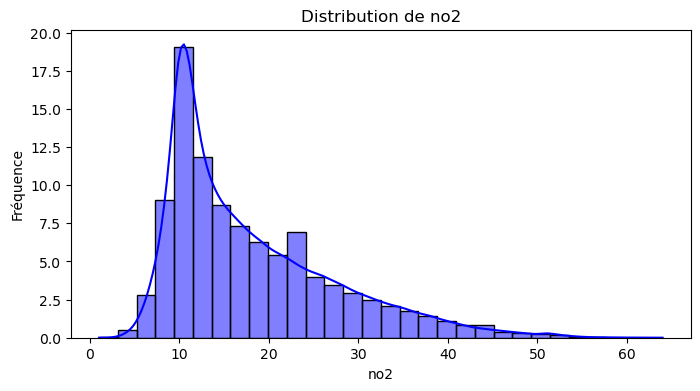


Analyse de la variable quantitative : o3
count    476485.000000
mean         31.834522
std          10.959234
min           1.000000
25%          25.000000
50%          31.000000
75%          38.000000
max          97.000000
Name: o3, dtype: float64


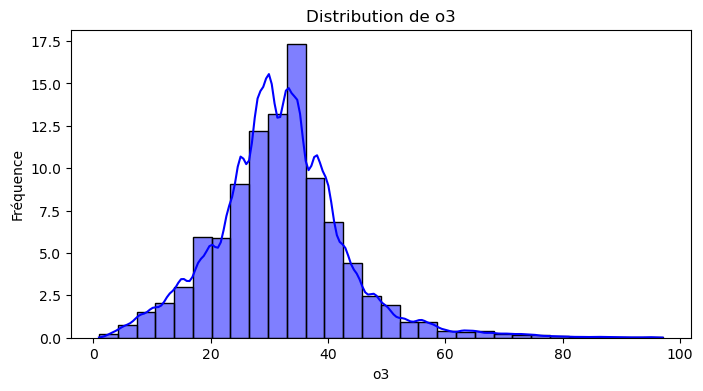


Analyse de la variable quantitative : pm10
count    476485.000000
mean         26.724308
std          14.170604
min           2.000000
25%          17.000000
50%          24.000000
75%          32.000000
max          99.000000
Name: pm10, dtype: float64


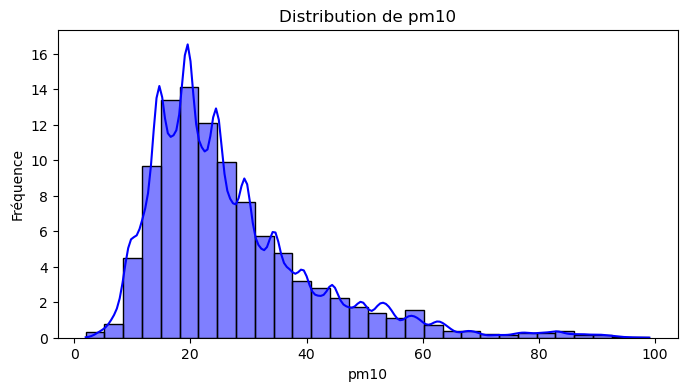

In [9]:
quantitative_vars = ['no2', 'o3', 'pm10']

for col in quantitative_vars:
    print(f"\nAnalyse de la variable quantitative : {col}")
    print(qualite_air[col].describe())
    
    # Histogramme
    plt.figure(figsize=(8, 4))
    sns.histplot(qualite_air[col], kde=True, bins=30, stat="percent", color='blue')
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()


La concentration en o3 est assez symétrique contrairement à no2 et pm10 qui sont présentent une asymétrie. Cela témoingne du fait que les faibles concentrations sont beaucoup plus représentées dans no2 et pm10. Comme nous souhaitons faire une fusion de bases de données, nous allons devoir résumer la base relative aux indices de l'air en données annuelles par département. Ces analyses univariées suggèrent  d'apporter certaines modifications aux variables pm10 et no2 afin de mieux savoir qu'elle statistique résumerait au mieux l'information dans ces variables.

In [10]:
# Pour chaque variable qualitative
qualitative_vars = ['date', 'ninsee']
for var in qualitative_vars:
    print(f"Résumé pour la variable '{var}':")
    freq_abs = qualite_air[var].value_counts()
    freq_rel = qualite_air[var].value_counts(normalize=True) * 100
    summary = pd.DataFrame({"Fréquence absolue": freq_abs, "Fréquence relative (%)": freq_rel})
    print(summary)
    print("\n")


Résumé pour la variable 'date':
            Fréquence absolue  Fréquence relative (%)
date                                                 
31/12/2017               1309                0.274720
01/01/2017               1309                0.274720
02/01/2017               1309                0.274720
03/01/2017               1309                0.274720
04/01/2017               1309                0.274720
...                       ...                     ...
18/01/2017               1309                0.274720
19/01/2017               1309                0.274720
20/01/2017               1309                0.274720
21/01/2017               1309                0.274720
27/09/2017                  9                0.001889

[365 rows x 2 columns]


Résumé pour la variable 'ninsee':
        Fréquence absolue  Fréquence relative (%)
ninsee                                           
93                    365                0.076603
92                    365                0.076603
91    

In [11]:
#Nous allons présenter ces variables de façon agrégée

for col in qualitative_vars:
    print(f"\nAnalyse de la variable qualitative : {col}")
    
    # Nombre de valeurs uniques
    unique_count = qualite_air[col].nunique()
    print(f"Nombre de valeurs uniques : {unique_count}")
    
    # Valeur la plus fréquente et son nombre d'occurrences
    value_counts = qualite_air[col].value_counts()
    most_common_count = value_counts.max()  # Nombre maximal d'occurrences
    most_common_values = value_counts[value_counts == most_common_count]
    
    # Afficher la valeur la plus fréquente et son nombre d'occurrences
    print(f"Valeur(s) la/les plus fréquente(s) dans '{col}' avec {most_common_count} occurrences :")
    print(most_common_values.index.tolist())
    
    # Nombre de modalités ayant ce nombre maximal d'occurrences
    num_modalities = most_common_values.shape[0]
    print(f"Nombre de modalités avec ce nombre maximal d'occurrences : {num_modalities}")



Analyse de la variable qualitative : date
Nombre de valeurs uniques : 365
Valeur(s) la/les plus fréquente(s) dans 'date' avec 1309 occurrences :
['31/12/2017', '01/01/2017', '02/01/2017', '03/01/2017', '04/01/2017', '05/01/2017', '06/01/2017', '07/01/2017', '08/01/2017', '09/01/2017', '10/01/2017', '11/01/2017', '12/01/2017', '22/11/2017', '23/11/2017', '24/11/2017', '25/11/2017', '26/11/2017', '27/11/2017', '28/11/2017', '29/11/2017', '14/11/2017', '15/11/2017', '16/11/2017', '17/11/2017', '18/11/2017', '19/11/2017', '20/11/2017', '21/11/2017', '06/11/2017', '07/11/2017', '08/11/2017', '09/11/2017', '10/11/2017', '11/11/2017', '12/11/2017', '13/11/2017', '29/10/2017', '30/10/2017', '31/10/2017', '01/11/2017', '02/11/2017', '03/11/2017', '04/11/2017', '05/11/2017', '11/03/2017', '12/03/2017', '13/03/2017', '14/03/2017', '15/03/2017', '16/03/2017', '17/03/2017', '18/03/2017', '03/03/2017', '04/03/2017', '05/03/2017', '06/03/2017', '07/03/2017', '08/03/2017', '09/03/2017', '10/03/2017',

Ici est présenté le fait que les données sont collectées sur les 365 jours de l'année 2017 et pour chaque jour, chacun des 8 départements (Paris (75); Seine-et-Marne (77); Yvelines (78); Essonne (91); Hauts-de-Seine (92); Seine-Saint-Denis (93); Val-de-Marne (94); Val-d’Oise (95)) de la région parisienne (0) a une valeurs qui y est associée. Justifiant ainsi le fait que nous souhaitons "résumer" les informations de façon anuelle et par département. En ce qui concerne les valeurs désagrégées (par arrondissement), nous n'en n'auront pas besoin car notre étude se limite au niveau départemental.

<h3 style=" text-align:left">
b. Données sur les pathologies  
</h3>

La base sur les pathologies respiratoires étant très volumineuse, nous avons dû la zipper pour la placer sur github. Nous allons donc la "dézipper" afin d'accéder aux données;

In [12]:
import zipfile
from pathlib import Path

# Chemins
zip_path = Path(DATA_DIR, "effectifs (4).csv.zip")  # Fichier ZIP
extract_path = Path(DATA_DIR)  # Dossier où extraire les fichiers

# Nom du fichier à extraire depuis l'archive
file_to_extract = "effectifs (4).csv"

# Extraction
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extraire uniquement un fichier spécifique
    effectifs = zip_ref.extract(file_to_extract, extract_path)
    print(f"Fichier {file_to_extract} extrait avec succès dans {extract_path} !")



Fichier effectifs (4).csv extrait avec succès dans /home/onyxia/work/projet-Python-1/projet/data !


In [13]:
import pandas as pd
pathologie = pd.read_csv(Path(DATA_DIR,"effectifs (4).csv"),sep=';')
pathologie.head(6)

,annee,patho_niv1,patho_niv2,patho_niv3,top,cla_age_5,sexe,region,dept,Ntop,Npop,prev,Niveau prioritaire,libelle_classe_age,libelle_sexe,tri
0,2017,Total consommants tous régimes,Total consommants tous régimes,Total consommants tous régimes,POP_TOT_IND,80-84,9,1,971,9520.0,9520,100.0,NaN,de 80 à 84 ans,tous sexes,NaN
1,2017,Total consommants tous régimes,Total consommants tous régimes,Total consommants tous régimes,POP_TOT_IND,80-84,9,2,999,10650.0,10650,100.0,NaN,de 80 à 84 ans,tous sexes,NaN
2,2017,Total consommants tous régimes,Total consommants tous régimes,Total consommants tous régimes,POP_TOT_IND,80-84,9,4,974,12430.0,12430,100.0,NaN,de 80 à 84 ans,tous sexes,NaN
3,2017,Total consommants tous régimes,Total consommants tous régimes,Total consommants tous régimes,POP_TOT_IND,80-84,9,4,999,12430.0,12430,100.0,NaN,de 80 à 84 ans,tous sexes,NaN
4,2017,Total consommants tous régimes,Total consommants tous régimes,Total consommants tous régimes,POP_TOT_IND,80-84,9,6,976,550.0,550,100.0,NaN,de 80 à 84 ans,tous sexes,NaN
5,2017,Total consommants tous régimes,Total consommants tous régimes,Total consommants tous régimes,POP_TOT_IND,80-84,9,11,75,49460.0,49460,100.0,NaN,de 80 à 84 ans,tous sexes,NaN


In [14]:
pathologie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579600 entries, 0 to 579599
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   annee               579600 non-null  int64  
 1   patho_niv1          579600 non-null  object 
 2   patho_niv2          519120 non-null  object 
 3   patho_niv3          448560 non-null  object 
 4   top                 579600 non-null  object 
 5   cla_age_5           579600 non-null  object 
 6   sexe                579600 non-null  int64  
 7   region              579600 non-null  int64  
 8   dept                579600 non-null  object 
 9   Ntop                421380 non-null  float64
 10  Npop                579600 non-null  int64  
 11  prev                421380 non-null  float64
 12  Niveau prioritaire  572040 non-null  object 
 13  libelle_classe_age  579600 non-null  object 
 14  libelle_sexe        579600 non-null  object 
 15  tri                 572040 non-nul

Explication des variables:

- **annee** : L'année de collecte des données. (2017 ici)
- **patho_niv1** : Groupe de pathologies (ou traitements chroniques ou épisodes de soins). Type : texte. Exemple : Maladies du foie ou du pancréas (hors mucoviscidose).
- **patho_niv2** : Sous-groupe de pathologies (ou traitements chroniques ou épisodes de soins). Type : texte. Exemple : Maladies du foie ou du pancréas (hors mucoviscidose).
- **patho_niv3** : Sous-groupe détaillé de pathologies (ou traitements chroniques ou épisodes de soins). Type : texte. Exemple : Maladies du foie ou du pancréas (hors mucoviscidose).
- **top** : Libellé technique de la pathologie (ou traitement chronique ou épisode de soins). Type : texte. Exemple : MFP_CAT_EXC (Maladie fonctionnelle primaire, excès.).
- **cla_age_5** : Classe d’âge (5 ans). Type : texte. Exemple : 00-04.
- **sexe** : Sexe des patients. Type : texte. Exemple : 9.  _Attention: 9 signifie que la mesure n'a pa sété faite de façon désagrégé entre hommes et femmes, mais conjointement._
- **region** : Région de résidence des patients. Type : texte. Exemple : 32.
- **dept** : Département de résidence des patients. Type : texte. Exemple : 80. _Attention: 999 signifie que la mesure n'a pas été de faite de façon désagrégée par département, mais conjointement sur plusieurs départements._
- **Ntop** : Effectif de patients pris en charge pour la pathologie (ou traitement chronique ou épisode de soins) dont il est question. Type : int.
- **Npop** : Population de référence qui est celle de la cartographie des pathologies et des dépenses de l’Assurance Maladie, effectif de patients par pathologie, sexe, classe d'âge et territoire (département, région). Type : int. Exemple : 27700.
- **prev** : Prévalence de patients pris en charge pour la pathologie (ou traitement chronique ou épisode de soins) dont il est question. Type : décimal.
- **Niveau prioritaire** : Niveau de priorité attribué à la pathologie. Type : texte. Exemple : 1, 2, 3. _Lorsqu’une pathologie est associée à plusieurs niveaux de priorité (1, 2, 3), cela peut indiquer que la pathologie en question peut varier en gravité ou en urgence selon les cas individuels._
- **libelle_classe_age** : Libellé de la classe d’âge. Type : texte. Exemple : de 0 à 4 ans.
- **libelle_sexe** : Libellé du sexe. Type : texte. Exemple : tous sexes. _Note: “Tous sexes” signifie que les données incluent à la fois les hommes et les femmes, sans distinction_
- **tri** :  Aucune description disponible pour ce champ. (Variable utilisée pour le tri des données.)

Ces variables permettent de structurer et d'analyser les données sur les pathologies et les dépenses de l'Assurance Maladie. 

Cette base semble ne pas avoir de valeurs manquantes. Cependant elle en possède bel et bien. Ceux-ci sont par exemple codifiés par "9" (variable sexe) ou par "999" (vaiable départements). 

**Notre étude devant se faire sur la région parisienne, nous allons faire un filtre pour ne garder que les observations relatives à la région 11 = Île de France.**

In [15]:
#on filtre les données par region (on s'interessent a la region parisienne) .
filtred_by_rg=pathologie[pathologie['region']==11]
#on peut maintenant supprimer la colonne region
filtred_by_rg=filtred_by_rg.drop(columns = ['region'])

In [16]:
#voir le nombre de pathologie par niveau
print(f" patho_niv1: {filtred_by_rg["patho_niv1"].nunique()} \n patho_niv2: {filtred_by_rg["patho_niv2"].nunique()} \n patho_niv3: {filtred_by_rg["patho_niv3"].nunique()}")

 patho_niv1: 18 
 patho_niv2: 48 
 patho_niv3: 61


In [17]:
#Nous ne voulons garder que les maladies respiratoires qui sont en rapport avec la qualité de l'air
new_pathologie = filtred_by_rg[filtred_by_rg['patho_niv2'].isin(['Maladies respiratoires chroniques (hors mucoviscidose)',
        'Cancer bronchopulmonaire'])]

new_pathologie.head(2)

,annee,patho_niv1,patho_niv2,patho_niv3,top,cla_age_5,sexe,dept,Ntop,Npop,prev,Niveau prioritaire,libelle_classe_age,libelle_sexe,tri
13356,2017,Maladies respiratoires chroniques (hors mucovi...,Maladies respiratoires chroniques (hors mucovi...,Maladies respiratoires chroniques (hors mucovi...,RES_CAT_EXC,85-89,2,77,1550.0,11990,12.957,"1,2,3",de 85 à 89 ans,femmes,10.0
13357,2017,Maladies respiratoires chroniques (hors mucovi...,Maladies respiratoires chroniques (hors mucovi...,Maladies respiratoires chroniques (hors mucovi...,RES_CAT_EXC,85-89,2,91,1380.0,11890,11.572,"1,2,3",de 85 à 89 ans,femmes,10.0


In [18]:
new_pathologie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2268 entries, 13356 to 579572
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   annee               2268 non-null   int64  
 1   patho_niv1          2268 non-null   object 
 2   patho_niv2          2268 non-null   object 
 3   patho_niv3          1701 non-null   object 
 4   top                 2268 non-null   object 
 5   cla_age_5           2268 non-null   object 
 6   sexe                2268 non-null   int64  
 7   dept                2268 non-null   object 
 8   Ntop                1562 non-null   float64
 9   Npop                2268 non-null   int64  
 10  prev                1562 non-null   float64
 11  Niveau prioritaire  2268 non-null   object 
 12  libelle_classe_age  2268 non-null   object 
 13  libelle_sexe        2268 non-null   object 
 14  tri                 2268 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 283.5

Nous allons supprimer des variables:
- les redondantes: 'libelle_classe_age' et 'libelle_sexe '
- les non nécessaires pour notre problématique: 'annee', 'patho_niv1', 'patho_niv2', 'patho_niv3', 'top'

En effet, l'idée étant de calculer la probabilité de contracter une maladie respiratoire, nous n'allons pas faire de distinction dans les niveaux de pathologie, ni voir la maladie spécifique concernée.

In [19]:
columns_to_drop = ['annee', 'patho_niv1', 'patho_niv2', 'patho_niv3', 'libelle_classe_age', 'libelle_sexe', 'top']
new_pathologie = new_pathologie.drop(columns=columns_to_drop)


In [20]:
#Comptons le nombre de valeurs uniques de chaque variable afin de savoir s'il faut faire des conversions de type
new_pathologie.nunique()

cla_age_5               21
sexe                     3
dept                     9
Ntop                   460
Npop                   549
prev                  1106
Niveau prioritaire       3
tri                      4
dtype: int64

Nous allons donc changer le type des variables 'sexe' et 'tri'

In [21]:
#Changer le type de la variable sexe
new_pathologie['sexe'] = new_pathologie['sexe'].astype('object')

In [22]:
#Changer le type de la variable tri
new_pathologie['tri'] = new_pathologie['tri'].astype('object')

**Résumé descriptif des variables catégorielles**

In [23]:
# Filtrer uniquement les variables catégorielles (type object)
categorical_vars = new_pathologie.select_dtypes(include='object')

# Résumé descriptif des variables catégorielles
for col in categorical_vars.columns:
    print(f"\nRésumé descriptif pour la variable '{col}':")
    print(f"- Nombre de valeurs uniques : {categorical_vars[col].nunique()}")
    
    # Calcul de la fréquence maximale et des modalités correspondantes
    value_counts = categorical_vars[col].value_counts()
    max_count = value_counts.max()
    top_modalities = value_counts[value_counts == max_count].index.tolist()
    
    print(f"- Nombre de modalités ayant la fréquence maximale ({max_count} occurrences) : {len(top_modalities)}")
    print(f"- Modalités ayant la fréquence maximale : {top_modalities}")



Résumé descriptif pour la variable 'cla_age_5':
- Nombre de valeurs uniques : 21
- Nombre de modalités ayant la fréquence maximale (108 occurrences) : 21
- Modalités ayant la fréquence maximale : ['85-89', '90-94', '95et+', 'tsage', '00-04', '05-09', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84']

Résumé descriptif pour la variable 'sexe':
- Nombre de valeurs uniques : 3
- Nombre de modalités ayant la fréquence maximale (756 occurrences) : 3
- Modalités ayant la fréquence maximale : [2, 9, 1]

Résumé descriptif pour la variable 'dept':
- Nombre de valeurs uniques : 9
- Nombre de modalités ayant la fréquence maximale (252 occurrences) : 9
- Modalités ayant la fréquence maximale : ['77', '91', '93', '78', '999', '75', '94', '95', '92']

Résumé descriptif pour la variable 'Niveau prioritaire':
- Nombre de valeurs uniques : 3
- Nombre de modalités ayant la fréquence maximale (1134 occurrences) : 1
- Mo

Les variables catégorielles semblent assez homogènes.

**Résumé descriptif des variables continues**

In [24]:
new_pathologie.describe()

,Ntop,Npop,prev
count,1562.000000,2.268000e+03,1562.000000
mean,3163.271447,1.653528e+05,2.574609
std,19228.221844,6.389070e+05,3.839486
min,10.000000,5.500000e+02,0.002000
25%,70.000000,3.251000e+04,0.183000
50%,270.000000,4.705000e+04,0.514000
75%,1860.000000,8.944000e+04,3.505000
max,574020.000000,1.171935e+07,17.086000


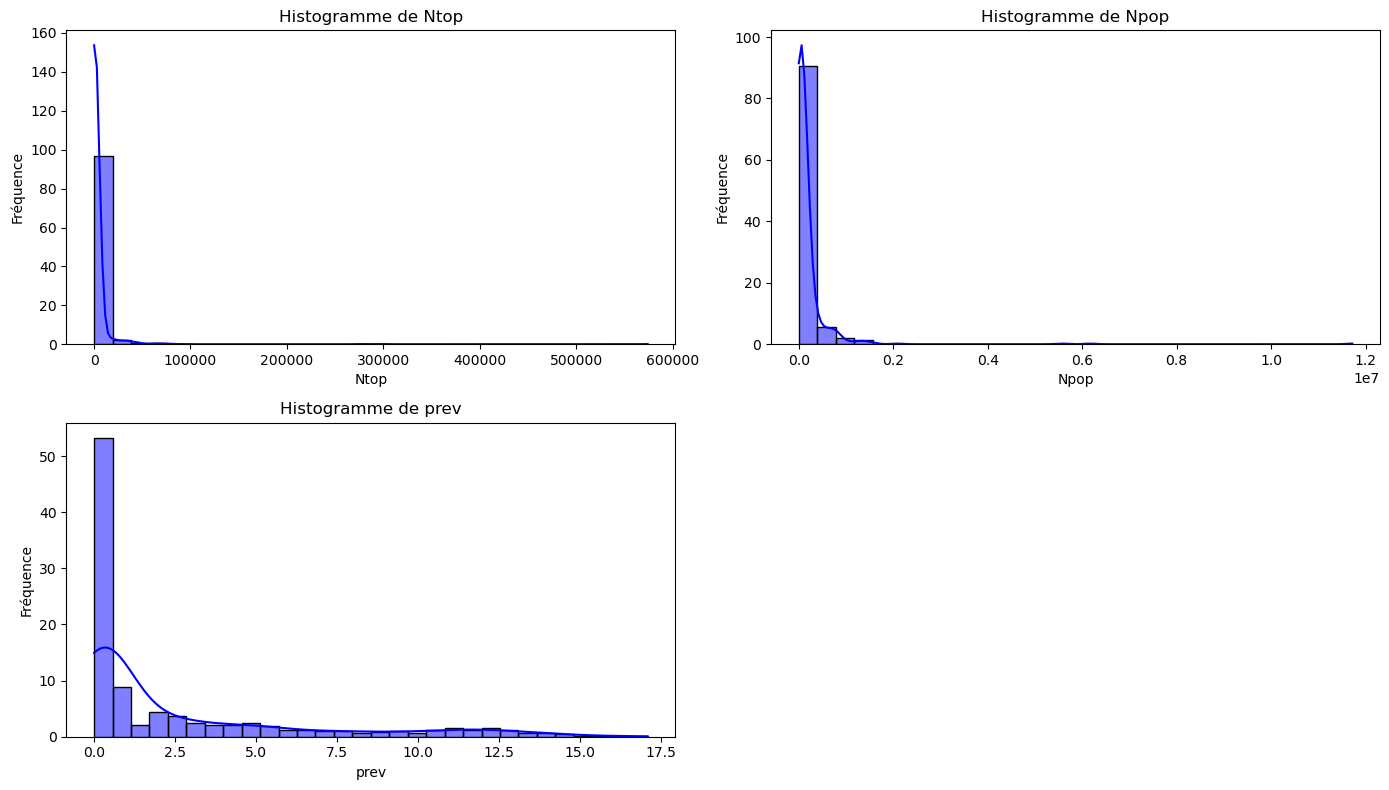

In [25]:
# Sélectionner les variables continues (float et int)
continuous_vars = new_pathologie.select_dtypes(include=['float64', 'int64']).columns

# Définir la taille de la figure globale
plt.figure(figsize=(14, 8))

# Boucle sur chaque variable continue
for i, col in enumerate(continuous_vars):
    # Position du graphique dans la grille (2 colonnes par ligne)
    plt.subplot((len(continuous_vars) + 1) // 2, 2, i + 1)  # Ligne en fonction de l'indice
    
    # Affichage de l'histogramme avec une courbe de densité
    sns.histplot(new_pathologie[col], bins=30, kde=True,stat='percent', color='blue')
    plt.title(f"Histogramme de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    
# Ajustement des espacements
plt.tight_layout()
plt.show()

Ces varibles sont assez dispersées. 

In [26]:
# Calculer la proportion de valeurs manquantes pour chaque variable
missing_proportions = new_pathologie.isnull().mean() * 100

# Afficher les proportions dans un tableau lisible
missing_summary = pd.DataFrame({
    "Variable": missing_proportions.index,
    "Proportion de valeurs manquantes (%)": missing_proportions.values
}).sort_values(by="Proportion de valeurs manquantes (%)", ascending=False)

print(missing_summary)

print("\n nombre d'observation",new_pathologie.shape[0])


             Variable  Proportion de valeurs manquantes (%)
3                Ntop                             31.128748
5                prev                             31.128748
1                sexe                              0.000000
0           cla_age_5                              0.000000
2                dept                              0.000000
4                Npop                              0.000000
6  Niveau prioritaire                              0.000000
7                 tri                              0.000000

 nombre d'observation 2268


Ainsi, sur 2268 observations de pathologies respiratoire dans la région parisienne, nous avons 31% de valeurs manquantes pour les variables 'Ntop' et 'prev'. Nous allons pousser les analyses pour voir comment corriger ces valeurs manquantes. 


In [27]:
# Test de Chi-2 : 'tri' et 'Niveau prioritaire'


from scipy.stats import chi2_contingency
# Créer un tableau de contingence entre 'tri' et 'Niveau prioritaire'
contingency_table = pd.crosstab(new_pathologie['tri'], new_pathologie['Niveau prioritaire'])

# Afficher le tableau de contingence
print("Tableau de contingence :")
print(contingency_table)

# Appliquer le test du chi-deux
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Afficher les résultats du test
print(f"\nChi2: {chi2}")
print(f"p-value: {p}")

# Interprétation des résultats
if p < 0.05:
    print("Il existe une relation significative entre 'tri' et 'Niveau prioritaire'.")
else:
    print("Il n'y a pas de relation significative entre 'tri' et 'Niveau prioritaire'.")

Tableau de contingence :
Niveau prioritaire  1,2,3    2    3
tri                                
10.0                  567    0    0
19.0                    0  567    0
58.0                    0    0  567
59.0                    0    0  567

Chi2: 4536.0
p-value: 0.0
Il existe une relation significative entre 'tri' et 'Niveau prioritaire'.


In [28]:
#on remarque une forte correlation entre tri et niveau prioritaire 
#on compare donc la distrubition 
print(new_pathologie[['tri', 'Niveau prioritaire']].drop_duplicates())

         tri Niveau prioritaire
13356   10.0              1,2,3
245627  19.0                  2
251462  58.0                  3
257301  59.0                  3


In [29]:
#niveau prioritaire est suffisant pour notre analyse 
#on supprime donc la colonne tri
new_data=new_pathologie.drop(columns =['tri'])

In [30]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2268 entries, 13356 to 579572
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cla_age_5           2268 non-null   object 
 1   sexe                2268 non-null   object 
 2   dept                2268 non-null   object 
 3   Ntop                1562 non-null   float64
 4   Npop                2268 non-null   int64  
 5   prev                1562 non-null   float64
 6   Niveau prioritaire  2268 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 141.8+ KB


Nous allons à présent faire une fusion de nos données afin de mieux continuer cette exploration très intéressante.

<h2 style=" text-align:left">
1.3- Fusion des bases de données 
</h2>

In [34]:
#on importe les donnees de l'indice de qualite de l'aire 
Qualite_aire= pd.read_csv(Path(DATA_DIR, "department_means.csv"), sep=",")
 #on verifie les nom du colunms avant de fisionner .
print(new_data.columns)
print(Qualite_aire.columns)

Index(['cla_age_5', 'sexe', 'dept', 'Ntop', 'Npop', 'prev',
       'Niveau prioritaire'],
      dtype='object')
Index(['ninsee', 'no2', 'o3', 'pm10'], dtype='object')


In [35]:
# on change le nom de la colonne ninsee 
Qualite_aire = Qualite_aire.rename(columns={'ninsee': 'dept'})

# on convertie la colonne dept en str pour les deux data
new_data['dept'] = new_data['dept'].astype(int)
Qualite_aire['dept'] = Qualite_aire['dept'].astype(int)

In [37]:
# on va faire un left joint 

principal_data = pd.merge(new_data,Qualite_aire, on="dept", how="left")
principal_data.head(5)

,cla_age_5,sexe,dept,Ntop,Npop,prev,Niveau prioritaire,no2,o3,pm10
0,85-89,2,77,1550.0,11990,12.957,"1,2,3",30.123288,35.389041,33.205479
1,85-89,2,91,1380.0,11890,11.572,"1,2,3",28.649315,34.536986,30.945205
2,85-89,2,93,1510.0,11760,12.874,"1,2,3",35.931507,32.013699,34.789041
3,85-89,9,77,2560.0,18490,13.863,"1,2,3",30.123288,35.389041,33.205479
4,85-89,9,78,2760.0,23040,11.992,"1,2,3",27.378082,35.106849,31.126027


In [ ]:
# Sauvegarder le DataFrame dans un fichier CSV
principal_data.to_csv("resultat_merge.csv", index=False)

print("Fichier  sauvegardé avec succès.")


Fichier  sauvegardé avec succès.
